## Intelligent Systems - HW2
### Soroush Mesforush Mashhad
#### SID: 810198472

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
import random
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dense , MaxPooling2D , Dropout
from tensorflow.keras.optimizers import SGD , Adam 

### Prerequisites

In [2]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 

In [3]:
def Loader():
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
    return X_train, Y_train, X_test, Y_test

### First ten photos

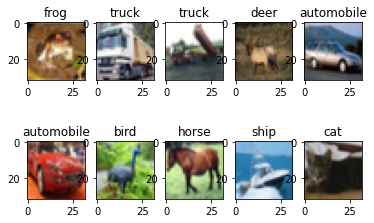

In [4]:
Cifar_Labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train, Y_train, X_test, Y_test = Loader()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.title(Cifar_Labels[Y_train[i][0]])

### Preprocessing

In [5]:
def preprocessing(X_train, Y_train, X_test, Y_test):
    # Transform label indices to one-hot encoded vectors
    Y_train = to_categorical(Y_train,num_classes = len(Cifar_Labels))
    Y_test = to_categorical(Y_test,num_classes = len(Cifar_Labels))
    #Because working with 4 dimensions is not possible but is possible in cnns, we
    #change the dimensions
    X_train = np.reshape(X_train,(X_train.shape[0],32*32*3))
    X_test = np.reshape(X_test,(X_test.shape[0],32*32*3))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    #Here we perform normalization
    X_train = X_train/255
    X_test = X_test/255
    #Test data must be kept unseen from the model until final evaluation hence we need 
    #validation dataset.
    _, X_valid, _, Y_valid = train_test_split(X_train, Y_train, 
        test_size=0.2, random_state= 8)
    return X_train, Y_train, X_test, Y_test, X_valid,Y_valid

In [6]:
def preprocessingcnn(X_train, Y_train, X_test, Y_test):
    # Transform label indices to one-hot encoded vectors
    Y_train = to_categorical(Y_train,num_classes = len(Cifar_Labels))
    Y_test = to_categorical(Y_test,num_classes = len(Cifar_Labels))
    #Because working with 4 dimensions is not possible but is possible in cnns, we
    #change the dimensions
   # X_train = np.reshape(X_train,(X_train.shape[0],32*32*3))
    #X_test = np.reshape(X_test,(X_test.shape[0],32*32*3))
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    #Here we perform normalization
    X_train = X_train/255
    X_test = X_test/255
    #Test data must be kept unseen from the model until final evaluation hence we need 
    #validation dataset.
    _, X_valid, _, Y_valid = train_test_split(X_train, Y_train, 
        test_size=0.2, random_state= 8)
    return X_train, Y_train, X_test, Y_test, X_valid,Y_valid

In [3]:
def Acc_plot(hist):
    fig = plt.figure()
    plt.plot(hist.history['accuracy'],'r')
    plt.plot(hist.history['val_accuracy'],'b')
    plt.title('Model Accuracy')
    plt.ylabel('Acc')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.grid()

In [8]:
def loss_plot(hist):
    fig = plt.figure()
    plt.plot(hist.history['loss'],'r')
    plt.plot(hist.history['val_loss'],'b')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.grid()

In [9]:
def AccLossConf(model , x_test , y_test ):
    Y_pred = model.model.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    Y_test = np.argmax(y_test, axis=1)
    test_loss,test_accuracy = model.model.evaluate(x_test,y_test)
    print('test loss = %f' % test_loss)
    print('test accuracy = %f' % test_accuracy)
    #confMat
    cm= confusion_matrix(Y_test, y_pred)  
    fig, ax = plt.subplots(figsize=(10,10)) 
    sn.heatmap(cm, annot=True,square = True,ax=ax)
    plt.xlabel('predicted value')
    plt.ylabel('true value');

In [10]:
def CompleteAnalysis(model , x_test , y_test ):
    Y_pred = model.model.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    Y_test = np.argmax(y_test, axis=1)
    test_loss,test_accuracy = model.model.evaluate(x_test,y_test)
    print('test loss = %f' % test_loss)
    print('test accuracy = %f' % test_accuracy)
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(Y_test, y_pred, average='macro')
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(Y_test, y_pred, average='macro')
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(Y_test, y_pred, average='macro')
    print('F1 score: %f' % f1)
    #confMat
    cm= confusion_matrix(Y_test, y_pred)  
    fig, ax = plt.subplots(figsize=(10,10)) 
    sn.heatmap(cm, annot=True,square = True,ax=ax)
    plt.xlabel('predicted value')
    plt.ylabel('true value');

In [11]:
def NeuralNetwork(Ac1,Ac2,Ac3,l,opt):
    model = Sequential()
    model.add(Dense(128,activation=Ac1,input_dim = 32*32*3))
    model.add(Dense(128,activation=Ac2))
    model.add(Dense(10,activation=Ac3))
    model.compile(loss=l, optimizer=opt, metrics=['accuracy'])
    return model

In [12]:
def NeuralNetworkcnn(l,opt):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(Flatten())
    model.add(Dense(128,activation='relu',input_dim = 32*32*3))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=l, optimizer=opt, metrics=['accuracy'])
    return model

In [13]:
def NeuralNetworkcnnpoolbatchnorm(l,opt):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(128,activation='relu',input_dim = 32*32*3))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=l, optimizer=opt, metrics=['accuracy'])
    return model

In [14]:
def NeuralNetworkcnndrop(l,opt):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu',input_dim = 32*32*3))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=l, optimizer=opt, metrics=['accuracy'])
    return model

In [15]:
def NeuralNetworkcnnEarlyStop(l,opt):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(128,activation='relu',input_dim = 32*32*3))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss=l, optimizer=opt, metrics=['accuracy'])
    return model

### Part 1 : Creating and testing model fro 32, 64 and 256

## Batch SIze = 32

In [16]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model32 = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','sgd')
history32 = model32.fit(X_train,Y_train, epochs=15, batch_size=32, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
1563/1563 [==============================] - 16s 9ms/step - loss: 1.8948 - accuracy: 0.3189 - val_loss: 1.7492 - val_accuracy: 0.3777
Epoch 2/15
1563/1563 [==============================] - 15s 9ms/step - loss: 1.7112 - accuracy: 0.3914 - val_loss: 1.6516 - val_accuracy: 0.4172
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6311 - accuracy: 0.4238 - val_loss: 1.6506 - val_accuracy: 0.4101
Epoch 4/15
1563/1563 [==============================] - 13s 9ms/step - loss: 1.5785 - accuracy: 0.4421 - val_loss: 1.7122 - val_accuracy: 0.3937
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5369 - accuracy: 0.4561 - val_loss: 1.5977 - val_accuracy: 0.4156
Epoch 6/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5002 - accuracy: 0.4706 - val_loss: 1.4773 - val_accuracy: 0.4691
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4681 - accuracy: 0.4800 - val_loss: 1.4910 - val_ac

### Batch Size = 64

In [17]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64 = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','sgd')
history64 = model64.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)
model64.summary()

Epoch 1/15
782/782 [==============================] - 8s 9ms/step - loss: 1.9581 - accuracy: 0.2999 - val_loss: 1.8961 - val_accuracy: 0.3291
Epoch 2/15
782/782 [==============================] - 8s 10ms/step - loss: 1.7871 - accuracy: 0.3704 - val_loss: 1.8790 - val_accuracy: 0.3327
Epoch 3/15
782/782 [==============================] - 7s 9ms/step - loss: 1.7086 - accuracy: 0.3974 - val_loss: 1.8043 - val_accuracy: 0.3522
Epoch 4/15
782/782 [==============================] - 8s 10ms/step - loss: 1.6525 - accuracy: 0.4188 - val_loss: 1.7471 - val_accuracy: 0.3689
Epoch 5/15
782/782 [==============================] - 7s 9ms/step - loss: 1.6090 - accuracy: 0.4343 - val_loss: 1.6453 - val_accuracy: 0.4077
Epoch 6/15
782/782 [==============================] - 8s 10ms/step - loss: 1.5742 - accuracy: 0.4462 - val_loss: 1.6363 - val_accuracy: 0.4111
Epoch 7/15
782/782 [==============================] - 7s 9ms/step - loss: 1.5447 - accuracy: 0.4531 - val_loss: 1.5514 - val_accuracy: 0.4416
Epo

### Batch Size = 256

In [18]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model256 = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','sgd')
history256 = model256.fit(X_train,Y_train, epochs=15, batch_size=256, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
196/196 [==============================] - 4s 15ms/step - loss: 2.0790 - accuracy: 0.2523 - val_loss: 1.9610 - val_accuracy: 0.2967
Epoch 2/15
196/196 [==============================] - 3s 14ms/step - loss: 1.9140 - accuracy: 0.3202 - val_loss: 1.9085 - val_accuracy: 0.3077
Epoch 3/15
196/196 [==============================] - 3s 13ms/step - loss: 1.8535 - accuracy: 0.3457 - val_loss: 1.8299 - val_accuracy: 0.3522
Epoch 4/15
196/196 [==============================] - 3s 13ms/step - loss: 1.8113 - accuracy: 0.3626 - val_loss: 1.8077 - val_accuracy: 0.3552
Epoch 5/15
196/196 [==============================] - 3s 13ms/step - loss: 1.7784 - accuracy: 0.3735 - val_loss: 1.7590 - val_accuracy: 0.3814
Epoch 6/15
196/196 [==============================] - 3s 14ms/step - loss: 1.7512 - accuracy: 0.3866 - val_loss: 1.7479 - val_accuracy: 0.3850
Epoch 7/15
196/196 [==============================] - 3s 14ms/step - loss: 1.7260 - accuracy: 0.3956 - val_loss: 1.8168 - val_accuracy: 0.3464

### Part 2 : Changing Activations

##### Sigmoid

In [19]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64sig = NeuralNetwork('sigmoid','sigmoid','softmax','categorical_crossentropy','sgd')
history64sig = model64sig.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 7s 8ms/step - loss: 2.2887 - accuracy: 0.1620 - val_loss: 2.2634 - val_accuracy: 0.1799
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 2.2374 - accuracy: 0.2293 - val_loss: 2.2067 - val_accuracy: 0.2756
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 2.1701 - accuracy: 0.2582 - val_loss: 2.1320 - val_accuracy: 0.2792
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 2.0983 - accuracy: 0.2745 - val_loss: 2.0671 - val_accuracy: 0.2806
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 2.0415 - accuracy: 0.2854 - val_loss: 2.0198 - val_accuracy: 0.2892
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 1.9987 - accuracy: 0.2954 - val_loss: 1.9852 - val_accuracy: 0.3018
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 1.9657 - accuracy: 0.3025 - val_loss: 1.9520 - val_accuracy: 0.3062
Epoch 

#### Accuracy and loss plot for train and validation with sigmoid activation

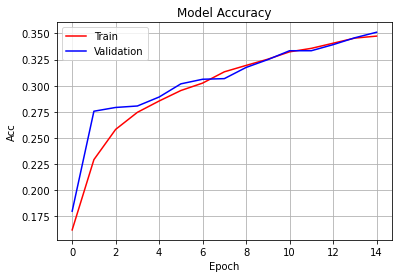

In [20]:
Acc_plot(history64sig)

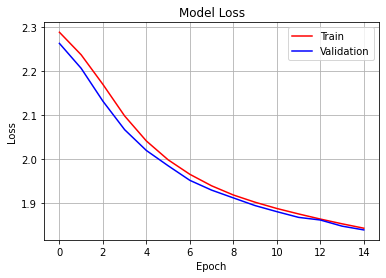

In [21]:
loss_plot(history64sig)

#### Confusion Matrix and accuracy and error for sigmoid activation

1563/1563 [==============================] - 3s 2ms/step - loss: 1.8407 - accuracy: 0.3526
test loss = 1.840652
test accuracy = 0.352620


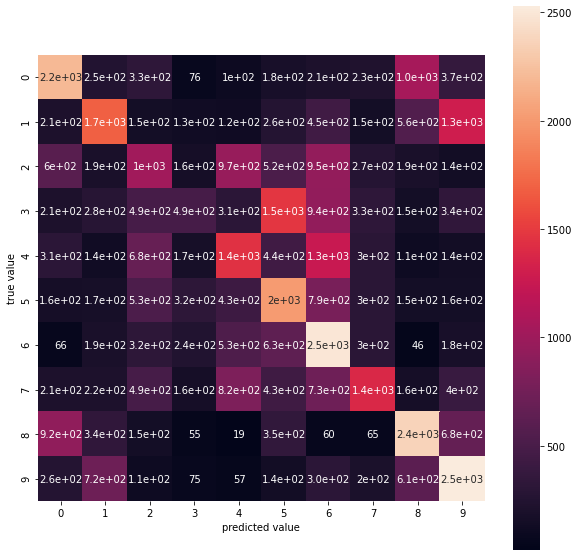

In [22]:
AccLossConf(history64sig,X_train,Y_train )

##### Tanh

In [23]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64tan = NeuralNetwork('tanh','tanh','softmax','categorical_crossentropy','sgd')
history64tan = model64tan.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 1.9343 - accuracy: 0.3067 - val_loss: 1.8745 - val_accuracy: 0.3464
Epoch 2/15
782/782 [==============================] - 3s 3ms/step - loss: 1.7746 - accuracy: 0.3737 - val_loss: 1.7369 - val_accuracy: 0.3925
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 1.7095 - accuracy: 0.3993 - val_loss: 1.7124 - val_accuracy: 0.3949
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 1.6585 - accuracy: 0.4150 - val_loss: 1.6400 - val_accuracy: 0.4169
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 1.6211 - accuracy: 0.4273 - val_loss: 1.6150 - val_accuracy: 0.4242
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5914 - accuracy: 0.4384 - val_loss: 1.6131 - val_accuracy: 0.4212
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5663 - accuracy: 0.4466 - val_loss: 1.5970 - val_accuracy: 0.4265
Epoch 

#### Accuracy and loss plot for train and validation with Tanh activation

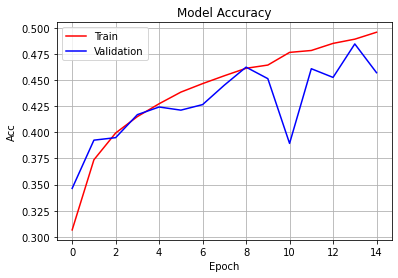

In [24]:
Acc_plot(history64tan)

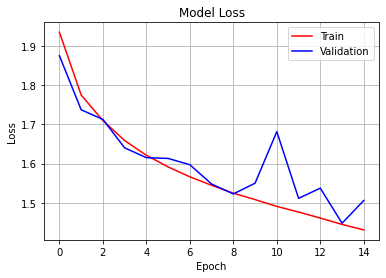

In [25]:
loss_plot(history64tan)

#### Confusion Matrix and accuracy and error for Tanh activation

1563/1563 [==============================] - 2s 2ms/step - loss: 1.5082 - accuracy: 0.4604
test loss = 1.508156
test accuracy = 0.460420


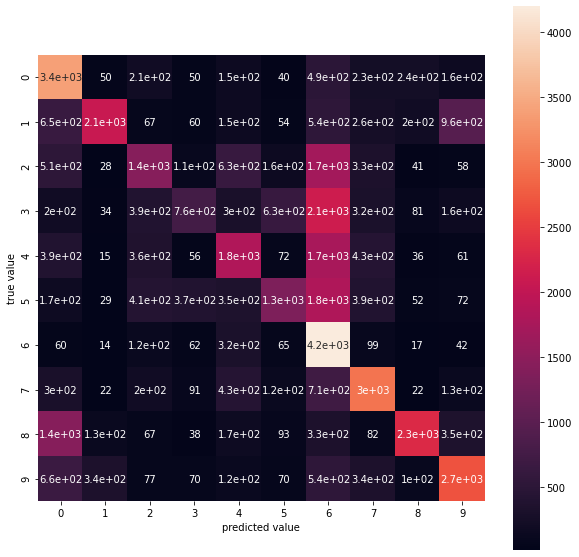

In [26]:
AccLossConf(history64tan,X_train,Y_train )

##### Selu

In [27]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64selu = NeuralNetwork('selu','selu','softmax','categorical_crossentropy','sgd')
history64selu = model64selu.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 1.9480 - accuracy: 0.3061 - val_loss: 1.9291 - val_accuracy: 0.2995
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 1.7708 - accuracy: 0.3736 - val_loss: 1.9125 - val_accuracy: 0.3250
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 1.7001 - accuracy: 0.4004 - val_loss: 1.6834 - val_accuracy: 0.4030
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 1.6496 - accuracy: 0.4167 - val_loss: 1.8410 - val_accuracy: 0.3571
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 1.6107 - accuracy: 0.4302 - val_loss: 1.6446 - val_accuracy: 0.4066
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5779 - accuracy: 0.4443 - val_loss: 1.6786 - val_accuracy: 0.4084
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5564 - accuracy: 0.4507 - val_loss: 1.6879 - val_accuracy: 0.3967
Epoch 

#### Accuracy and loss plot for train and validation with selu activation

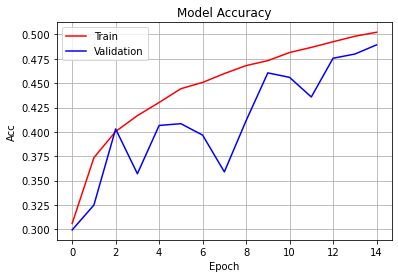

In [28]:
Acc_plot(history64selu)

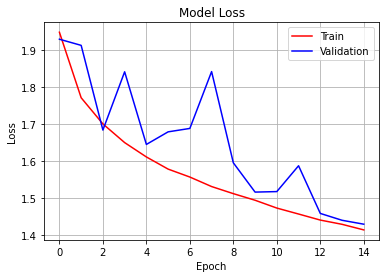

In [29]:
loss_plot(history64selu)

#### Confusion Matrix and accuracy and error for selu activation

1563/1563 [==============================] - 3s 2ms/step - loss: 1.4360 - accuracy: 0.4880
test loss = 1.436009
test accuracy = 0.488000


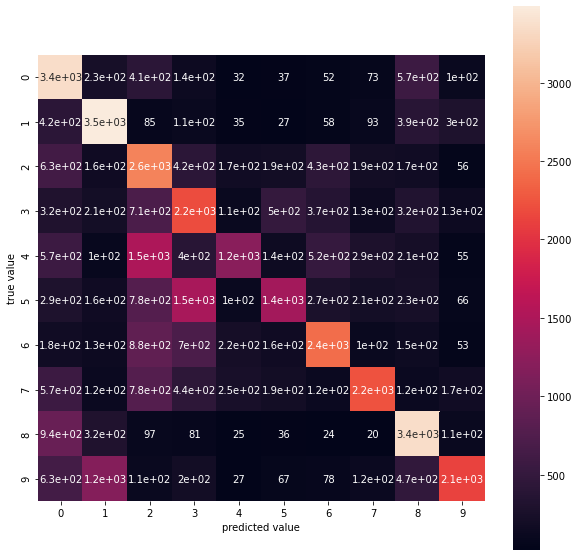

In [30]:
AccLossConf(history64selu,X_train,Y_train )

## Part 3 : Changing the loss function (we shall continue with relu)

### Poisson Loss

In [31]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64poi = NeuralNetwork('relu','relu','softmax','poisson','sgd')
history64poi = model64poi.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 4s 4ms/step - loss: 0.3218 - accuracy: 0.2045 - val_loss: 0.3132 - val_accuracy: 0.2530
Epoch 2/15
782/782 [==============================] - 3s 3ms/step - loss: 0.3071 - accuracy: 0.2743 - val_loss: 0.3025 - val_accuracy: 0.2835
Epoch 3/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2987 - accuracy: 0.3042 - val_loss: 0.2958 - val_accuracy: 0.3052
Epoch 4/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2935 - accuracy: 0.3208 - val_loss: 0.2919 - val_accuracy: 0.3212
Epoch 5/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2900 - accuracy: 0.3358 - val_loss: 0.2886 - val_accuracy: 0.3381
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2872 - accuracy: 0.3466 - val_loss: 0.2861 - val_accuracy: 0.3450
Epoch 7/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2850 - accuracy: 0.3554 - val_loss: 0.2841 - val_accuracy: 0.3541
Epoch 

#### Accuracy and loss plot for train and validation with poisson loss function

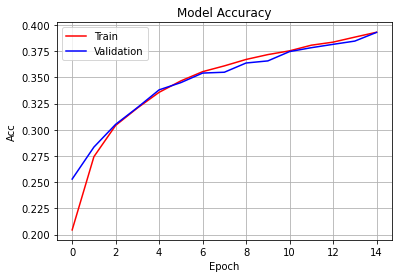

In [32]:
Acc_plot(history64poi)

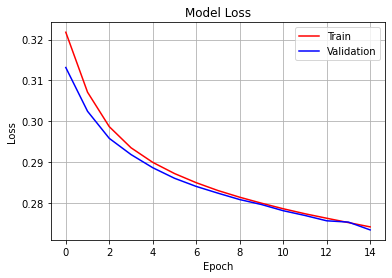

In [33]:
loss_plot(history64poi)

#### Confusion Matrix and accuracy and error with poisson loss function

1563/1563 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.3956
test loss = 0.273509
test accuracy = 0.395600


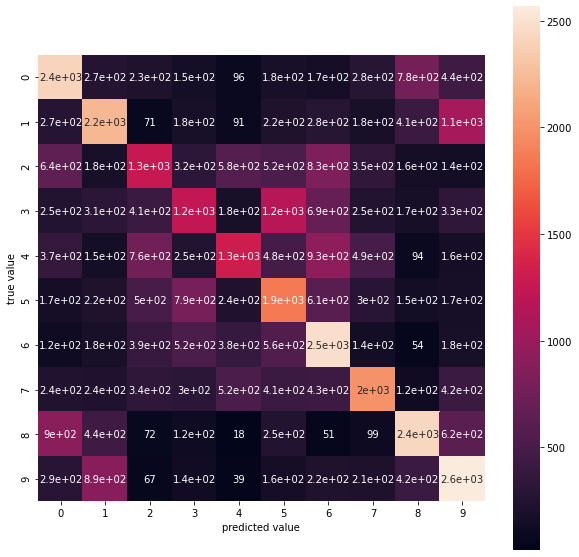

In [34]:
AccLossConf(history64poi,X_train,Y_train )

### MeanSquaredError

In [35]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64MSE = NeuralNetwork('relu','relu','softmax','MeanSquaredError','sgd')
history64MSE = model64MSE.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0899 - accuracy: 0.1273 - val_loss: 0.0892 - val_accuracy: 0.1582
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0886 - accuracy: 0.1836 - val_loss: 0.0880 - val_accuracy: 0.2028
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0876 - accuracy: 0.2138 - val_loss: 0.0871 - val_accuracy: 0.2289
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.2361 - val_loss: 0.0862 - val_accuracy: 0.2438
Epoch 5/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0858 - accuracy: 0.2477 - val_loss: 0.0854 - val_accuracy: 0.2546
Epoch 6/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0850 - accuracy: 0.2574 - val_loss: 0.0847 - val_accuracy: 0.2590
Epoch 7/15
782/782 [==============================] - 3s 3ms/step - loss: 0.0843 - accuracy: 0.2663 - val_loss: 0.0840 - val_accuracy: 0.2690
Epoch 

#### Accuracy and loss plot for train and validation with MeanSquaredError loss function

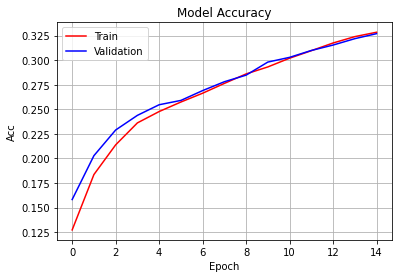

In [36]:
Acc_plot(history64MSE)

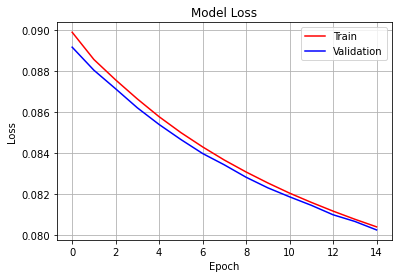

In [37]:
loss_plot(history64MSE)

#### Confusion Matrix and accuracy and error with MeanSquaredError loss function

1563/1563 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.3327
test loss = 0.080179
test accuracy = 0.332700


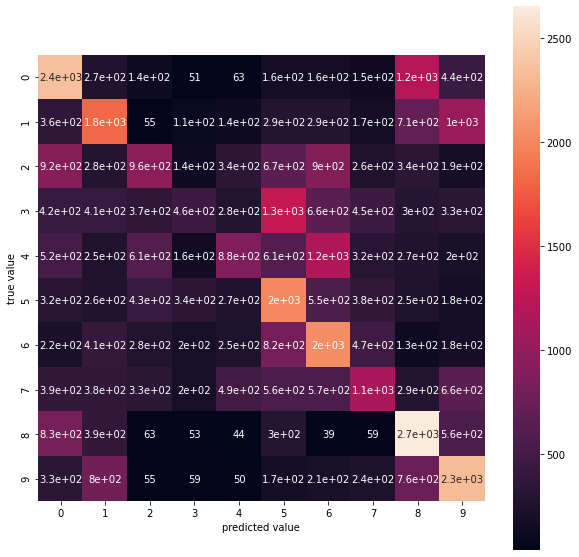

In [38]:
AccLossConf(history64MSE,X_train,Y_train )

### Part 4 : Changing the optimizer

#### Adam

In [39]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64adam = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','adam')
history6adam = model64adam.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 5s 6ms/step - loss: 1.8580 - accuracy: 0.3291 - val_loss: 1.7640 - val_accuracy: 0.3550
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6807 - accuracy: 0.3988 - val_loss: 1.6233 - val_accuracy: 0.4169
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6076 - accuracy: 0.4239 - val_loss: 1.5285 - val_accuracy: 0.4551
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5559 - accuracy: 0.4450 - val_loss: 1.5821 - val_accuracy: 0.4325
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5287 - accuracy: 0.4573 - val_loss: 1.4826 - val_accuracy: 0.4731
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 1.4997 - accuracy: 0.4656 - val_loss: 1.4845 - val_accuracy: 0.4711
Epoch 7/15
782/782 [==============================] - 4s 6ms/step - loss: 1.4774 - accuracy: 0.4738 - val_loss: 1.4901 - val_accuracy: 0.4686
Epoch 

### RMSprop

In [40]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64RMS = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','RMSprop')
history64RMS = model64RMS.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 1.9534 - accuracy: 0.2977 - val_loss: 1.8734 - val_accuracy: 0.3299
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 1.7362 - accuracy: 0.3749 - val_loss: 1.8528 - val_accuracy: 0.3441
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6628 - accuracy: 0.4033 - val_loss: 1.6178 - val_accuracy: 0.4163
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6131 - accuracy: 0.4245 - val_loss: 1.7880 - val_accuracy: 0.3693
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5732 - accuracy: 0.4409 - val_loss: 1.5200 - val_accuracy: 0.4563
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5441 - accuracy: 0.4479 - val_loss: 1.6083 - val_accuracy: 0.4284
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5176 - accuracy: 0.4593 - val_loss: 1.5595 - val_accuracy: 0.4421
Epoch 

### Part 5 :  Using the best model

In [41]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessing(X_train, Y_train, X_test, Y_test)
model64adam = NeuralNetwork('relu','relu','softmax','categorical_crossentropy','adam')
history64adam = model64adam.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 5s 5ms/step - loss: 1.8566 - accuracy: 0.3291 - val_loss: 1.7294 - val_accuracy: 0.3751
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6843 - accuracy: 0.3971 - val_loss: 1.6944 - val_accuracy: 0.3895
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 1.6147 - accuracy: 0.4220 - val_loss: 1.6166 - val_accuracy: 0.4195
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5671 - accuracy: 0.4405 - val_loss: 1.5939 - val_accuracy: 0.4327
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 1.5293 - accuracy: 0.4526 - val_loss: 1.5435 - val_accuracy: 0.4489
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 1.4946 - accuracy: 0.4676 - val_loss: 1.4566 - val_accuracy: 0.4780
Epoch 7/15
782/782 [==============================] - 4s 5ms/step - loss: 1.4755 - accuracy: 0.4745 - val_loss: 1.4519 - val_accuracy: 0.4825
Epoch 

1563/1563 [==============================] - 3s 2ms/step - loss: 1.3097 - accuracy: 0.5346
test loss = 1.309681
test accuracy = 0.534580
Accuracy: 0.534580
Precision: 0.535605
Recall: 0.534580
F1 score: 0.531291


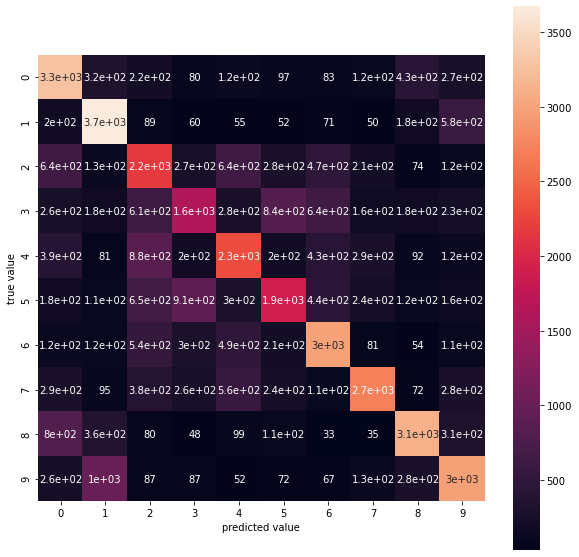

In [42]:
CompleteAnalysis(history64adam,X_train,Y_train)

# Part B : MLP + CNN

In [43]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessingcnn(X_train, Y_train, X_test, Y_test)
model64adamcnn = NeuralNetworkcnn('categorical_crossentropy','adam')
history64adamcnn = model64adamcnn.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 62s 78ms/step - loss: 1.3719 - accuracy: 0.5069 - val_loss: 1.0749 - val_accuracy: 0.6194
Epoch 2/15
782/782 [==============================] - 59s 76ms/step - loss: 0.9450 - accuracy: 0.6652 - val_loss: 0.6895 - val_accuracy: 0.7624
Epoch 3/15
782/782 [==============================] - 59s 75ms/step - loss: 0.7304 - accuracy: 0.7428 - val_loss: 0.5188 - val_accuracy: 0.8302
Epoch 4/15
782/782 [==============================] - 57s 73ms/step - loss: 0.5445 - accuracy: 0.8100 - val_loss: 0.3487 - val_accuracy: 0.8914
Epoch 5/15
782/782 [==============================] - 58s 74ms/step - loss: 0.3762 - accuracy: 0.8686 - val_loss: 0.1937 - val_accuracy: 0.9415
Epoch 6/15
782/782 [==============================] - 57s 73ms/step - loss: 0.2206 - accuracy: 0.9247 - val_loss: 0.1348 - val_accuracy: 0.9572
Epoch 7/15
782/782 [==============================] - 58s 75ms/step - loss: 0.1503 - accuracy: 0.9484 - val_loss: 0.1070 - val_accuracy:

313/313 [==============================] - 2s 8ms/step - loss: 2.9816 - accuracy: 0.6281
test loss = 2.981566
test accuracy = 0.628100
Accuracy: 0.628100
Precision: 0.628181
Recall: 0.628100
F1 score: 0.625952


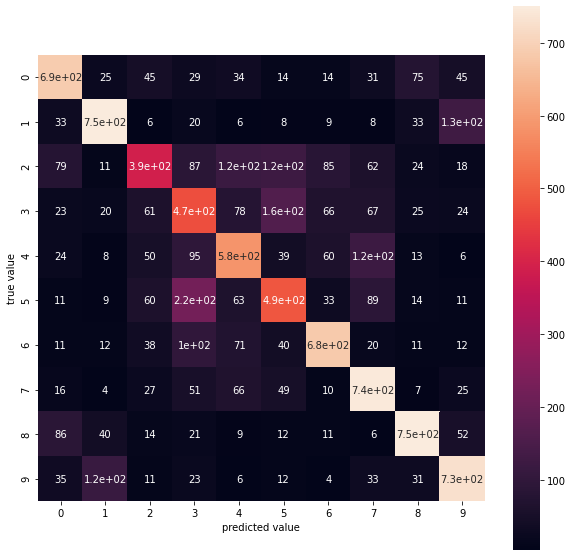

In [44]:
CompleteAnalysis(history64adamcnn , X_test , Y_test )

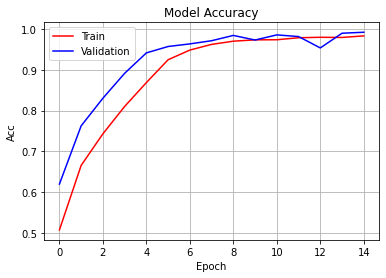

In [45]:
Acc_plot(history64adamcnn)

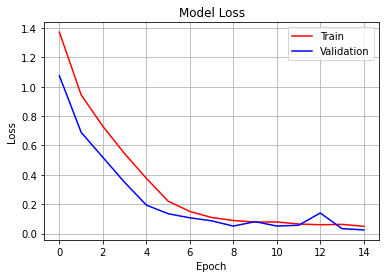

In [46]:
loss_plot(history64adamcnn)

### Part 2 : adding max pooling and batch normalization


In [47]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessingcnn(X_train, Y_train, X_test, Y_test)
model64adamcnnbp = NeuralNetworkcnnpoolbatchnorm('categorical_crossentropy','adam')
history64adamcnnbp = model64adamcnnbp.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 31s 38ms/step - loss: 1.2756 - accuracy: 0.5460 - val_loss: 0.9410 - val_accuracy: 0.6702
Epoch 2/15
782/782 [==============================] - 30s 39ms/step - loss: 0.9146 - accuracy: 0.6784 - val_loss: 0.8208 - val_accuracy: 0.7046
Epoch 3/15
782/782 [==============================] - 29s 37ms/step - loss: 0.7608 - accuracy: 0.7303 - val_loss: 0.6284 - val_accuracy: 0.7791
Epoch 4/15
782/782 [==============================] - 30s 38ms/step - loss: 0.6422 - accuracy: 0.7708 - val_loss: 0.5646 - val_accuracy: 0.7972
Epoch 5/15
782/782 [==============================] - 29s 37ms/step - loss: 0.5513 - accuracy: 0.8042 - val_loss: 0.4384 - val_accuracy: 0.8470
Epoch 6/15
782/782 [==============================] - 29s 37ms/step - loss: 0.4718 - accuracy: 0.8312 - val_loss: 0.3684 - val_accuracy: 0.8715
Epoch 7/15
782/782 [==============================] - 30s 38ms/step - loss: 0.3989 - accuracy: 0.8580 - val_loss: 0.4330 - val_accuracy:

313/313 [==============================] - 2s 6ms/step - loss: 1.6031 - accuracy: 0.6761
test loss = 1.603063
test accuracy = 0.676100
Accuracy: 0.676100
Precision: 0.700380
Recall: 0.676100
F1 score: 0.681632


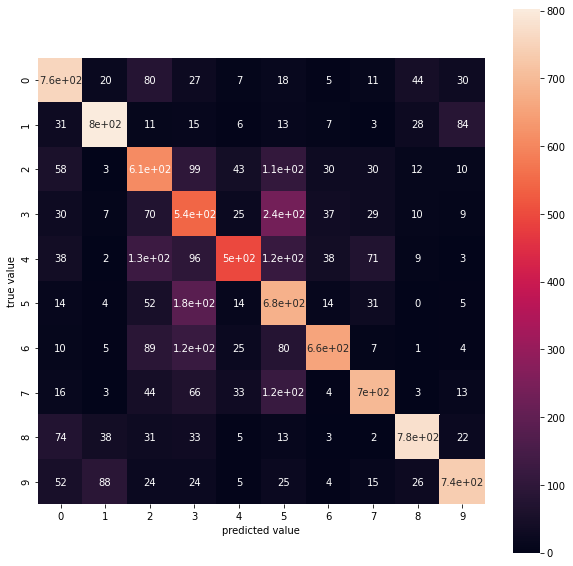

In [48]:
CompleteAnalysis(history64adamcnnbp , X_test , Y_test )

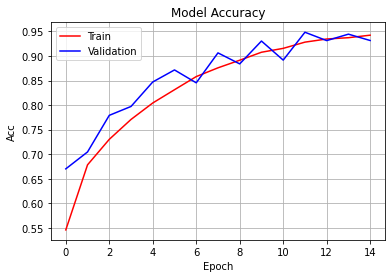

In [49]:
Acc_plot(history64adamcnnbp)

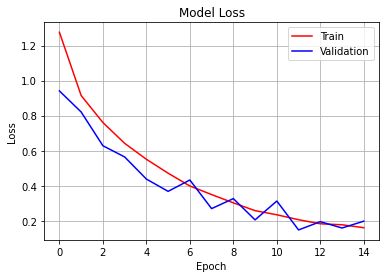

In [50]:
loss_plot(history64adamcnnbp)

### Part 3 : Adding Dropout


In [51]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessingcnn(X_train, Y_train, X_test, Y_test)
model64adamcnnbpd = NeuralNetworkcnndrop('categorical_crossentropy','adam')
history64adamcnnbpd = model64adamcnnbpd.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/15
782/782 [==============================] - 37s 45ms/step - loss: 1.4404 - accuracy: 0.4823 - val_loss: 1.3081 - val_accuracy: 0.5348
Epoch 2/15
782/782 [==============================] - 34s 44ms/step - loss: 1.1163 - accuracy: 0.6028 - val_loss: 1.2351 - val_accuracy: 0.5748
Epoch 3/15
782/782 [==============================] - 34s 44ms/step - loss: 0.9943 - accuracy: 0.6451 - val_loss: 0.7949 - val_accuracy: 0.7186
Epoch 4/15
782/782 [==============================] - 34s 43ms/step - loss: 0.9184 - accuracy: 0.6743 - val_loss: 0.8778 - val_accuracy: 0.6910
Epoch 5/15
782/782 [==============================] - 35s 45ms/step - loss: 0.8606 - accuracy: 0.6938 - val_loss: 0.7139 - val_accuracy: 0.7553
Epoch 6/15
782/782 [==============================] - 33s 42ms/step - loss: 0.8170 - accuracy: 0.7138 - val_loss: 0.6629 - val_accuracy: 0.7566
Epoch 7/15
782/782 [==============================] - 34s 43ms/step - loss: 0.7748 - accuracy: 0.7252 - val_loss: 0.6814 - val_accuracy:

313/313 [==============================] - 2s 6ms/step - loss: 0.7780 - accuracy: 0.7298
test loss = 0.778038
test accuracy = 0.729800
Accuracy: 0.729800
Precision: 0.747035
Recall: 0.729800
F1 score: 0.731516


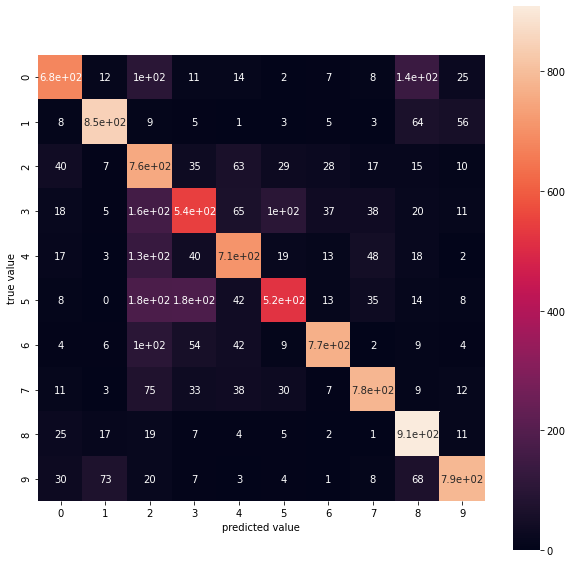

In [52]:
CompleteAnalysis(history64adamcnnbpd , X_test , Y_test )

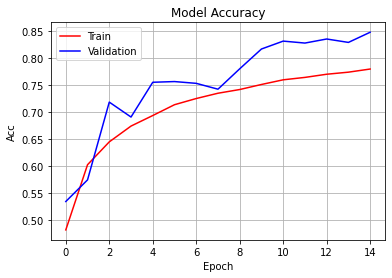

In [53]:
Acc_plot(history64adamcnnbpd)

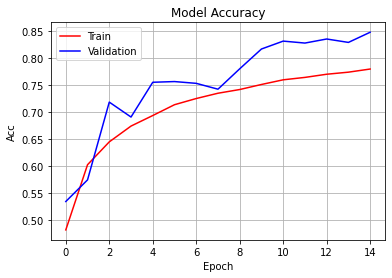

In [54]:
Acc_plot(history64adamcnnbpd)

### Part 4 : Early Stopping

In [55]:
X_train, Y_train, X_test, Y_test = Loader()
X_train, Y_train, X_test, Y_test, X_valid,Y_valid = preprocessingcnn(X_train, Y_train, X_test, Y_test)
model64adamcnnerl = NeuralNetworkcnnEarlyStop('categorical_crossentropy','adam')
es = EarlyStopping(monitor='val_accuracy', mode='max',min_delta=1,verbose=1, patience=5)
history64adamcnnerl = model64adamcnnerl.fit(X_train,Y_train, epochs=15, batch_size=64, validation_data=(X_valid, Y_valid),callbacks=[es],verbose=1)

Epoch 1/15
782/782 [==============================] - 35s 43ms/step - loss: 1.4765 - accuracy: 0.4707 - val_loss: 1.3721 - val_accuracy: 0.5186
Epoch 2/15
782/782 [==============================] - 33s 43ms/step - loss: 1.1906 - accuracy: 0.5742 - val_loss: 1.3616 - val_accuracy: 0.5255
Epoch 3/15
782/782 [==============================] - 36s 45ms/step - loss: 1.0452 - accuracy: 0.6292 - val_loss: 1.1625 - val_accuracy: 0.6078
Epoch 4/15
782/782 [==============================] - 37s 47ms/step - loss: 0.9614 - accuracy: 0.6553 - val_loss: 0.8053 - val_accuracy: 0.7223
Epoch 5/15
782/782 [==============================] - 34s 43ms/step - loss: 0.8970 - accuracy: 0.6813 - val_loss: 0.8304 - val_accuracy: 0.7072
Epoch 6/15
782/782 [==============================] - 34s 43ms/step - loss: 0.8488 - accuracy: 0.6985 - val_loss: 0.6863 - val_accuracy: 0.7601
Epoch 6: early stopping


313/313 [==============================] - 2s 6ms/step - loss: 0.8985 - accuracy: 0.6888
test loss = 0.898465
test accuracy = 0.688800
Accuracy: 0.688800
Precision: 0.711041
Recall: 0.688800
F1 score: 0.692636


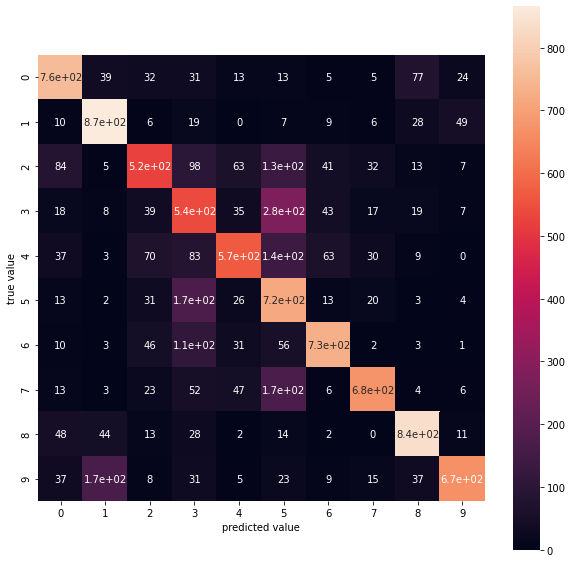

In [56]:
CompleteAnalysis(history64adamcnnerl, X_test , Y_test )

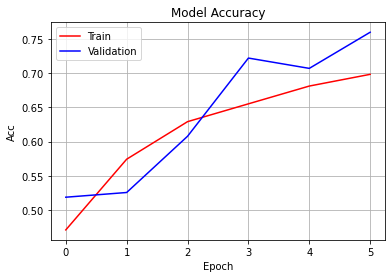

In [57]:
Acc_plot(history64adamcnnerl)

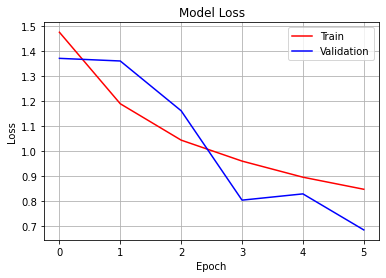

In [58]:
loss_plot(history64adamcnnerl)